# Scipy Stats Jupyter Notebook

[Official Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

***

## Python Libaries

In [1]:
import random
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Plot styles

In [2]:
#default plot style
plt.style.use('fivethirtyeight')

#default plot size
plt.rcParams['figure.figsize'] = [12, 6]

***

## Student t-test

The T-Test is used to determine if the mean (average) of two groups are truly different.

https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

https://en.wikipedia.org/wiki/Student%27s_t-test

#### Types of T-Test
There are three types of T-Tests that you can run.

* Independent Sample T-Test. 
In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

* Paired Sample T-Test. 
In this test, you compare the average of two samples taken from the same population but at different points in time. A simple example would be when you would like to test the means of before and after observations taken from the same target.

* One-Sample T-Test
Test if the average of a single group is different from a known average or hypothesized average.

#### One-sample test formula


${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{s/{\sqrt {n}}}}}$

#### Independent two-sample t-test

${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}}$


### Assumptions for t-test

* Dependent variable should be measured on a continuous scale.

* Independent variables should consist of two categorical, independent groups.

* Independence of observations.

* There should be no significant outliers.

* Dependent variable should be approximately normally distributed for each group of the independent variables.

* There needs to be homogeneity of variances.

***




In [3]:
import random
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Python Independent Sample T-Test
* 2 samples of 50 observations generated
* Sample A is taken from a population of mean 55 and a standard deviation of 20. 
* Sample B is taken from a population of mean 50 and a standard deviation of 15.

In [4]:
random.seed(20) #for results to be recreated
N = 50 #number of samples to take from each population
a = [random.gauss(2,.3) for x in range(N)] #take N samples from population A
b = [random.gauss(2,.3) for x in range(N)] #take N samples from population B

Text(0.5, 1.0, 'Independent Sample T-Test')

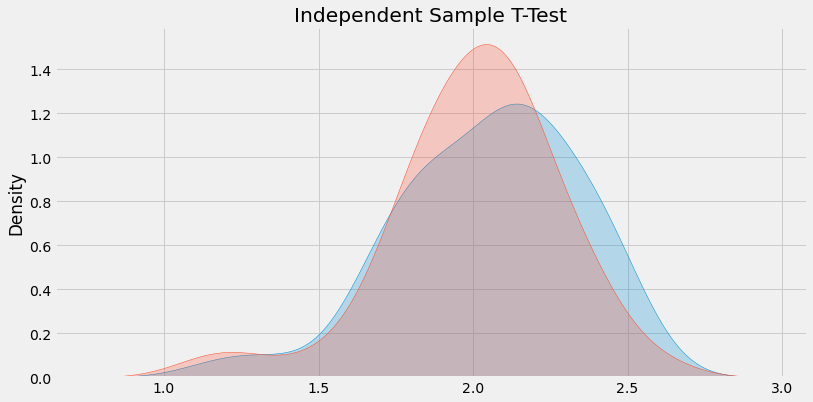

In [5]:
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

## * Null Hypothesis: µa = µb (the means of both populations are equal)
* Alternate Hypothesis: µa ≠ µb (the means of both populations are not equal)

In [6]:
tStat, pValue = ss.ttest_ind(a, b, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.017485741540118758 T-Statistic:2.421942924642376t

P-Value:0.41819460730578417 T-Statistic:0.8130021446014069


* There is enough evidence to reject the Null Hypothesis as the P-Value is low (typically ≤ 0.05).

In [7]:
c = [random.gauss(54,20) for x in range(N)] #take N samples from population C
d = [random.gauss(55,20) for x in range(N)] #take N samples from population D

Text(0.5, 1.0, 'Independent Sample T-Test')

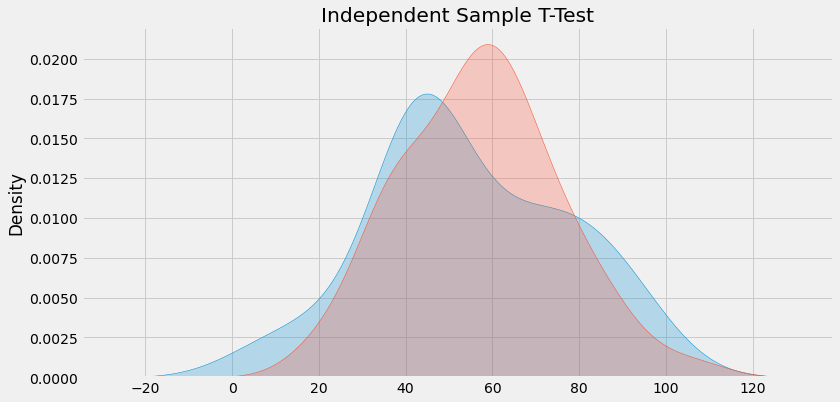

In [8]:
sns.kdeplot(c, shade=True)
sns.kdeplot(d, shade=True)
plt.title("Independent Sample T-Test")

In [9]:
tStat, pValue = ss.ttest_ind(c, d, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic


P-Value:0.5745272129534358 T-Statistic:-0.5633746497208574


* There is enough evidence to accept the Null Hypothesis as the P-Value is high (typically >= 0.05).

In [10]:
# Let's run 10000 t-tests where the means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s_a,s_b = 55.0, 50.0, 20.0 ,15.0
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s_a, size=N)
    b = np.random.normal(loc=m_b, scale=s_b, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

50.94%


In [11]:
trials = 10000
N = 100
#m_a, m_b, s = 2.0, 2.0, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s_a, size=N)
    b = np.random.normal(loc=m_b, scale=s_b, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

49.31%


### One test sample

* Null Hypothesis: $µa = X$ (the population mean is equal to a mean of X)
* Alternate Hypothesis: $µa ≠ X$ (he population mean is not equal to a mean of X )

In [12]:
import random
import scipy.stats as ss

random.seed(20) #for results to be recreated

N = 30 #number of samples to take from each population

a = [random.gauss(50,15) for x in range(N)] #take N samples from population A

popmean = 50.5  #hypothesized population mean

In [13]:
tStat, pValue =  ss.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic
###P-Value:0.5340949682112062 T-Statistic:0.6292755379958038

P-Value:0.5340949682112062 T-Statistic:0.6292755379958038


Since the P-Value is not low, 0.5 in this case, we fail to reject the Null Hypothesis. Statistically speaking, there is not enough evidence to conclude that the population average (mean) is not equal to 50.5.

## References

***

# End